In [3]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
data1 = rnd.normal(50,10,(50,2))
data2 = rnd.normal(-60,40,(50,2))
data3 = rnd.normal(150,20,(50,2))
a = [(0,150) for i in range(50)]
b = [(0,150) for i in range(50)]
data4 = rnd.normal(150,10,(50,2)) - a
data5 = rnd.normal(-60,20,(50,2)) + b 
#data4 = rnd.normal(-150,40,(50,2))
#data4 = rnd.normal(-60,40,50)
#a = [50 for i in range(50)]
#data4 = np.stack([data4,a],axis=1)
data_all = data1
data_all = np.append(data_all,data2,axis=0)
data_all = np.append(data_all,data3,axis=0)
data_all = np.append(data_all,data4,axis=0)
data_all = np.append(data_all,data5,axis=0)

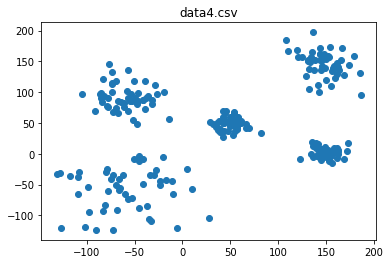

In [39]:
plt.title('data4.csv')
plt.scatter(data_all[:,0],data_all[:,1])

In [40]:
df = pd.DataFrame(data=data_all)
df.to_csv('data4.csv',header=False,index=False)

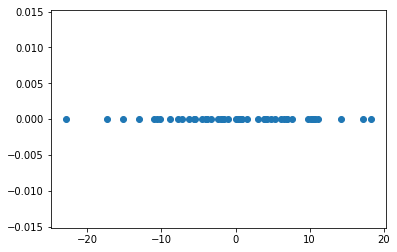

In [44]:
import numpy.random as rnd
data = rnd.normal(0,10,50)
plt.scatter(data,[0 for i in range(50)])

(-30, 30)

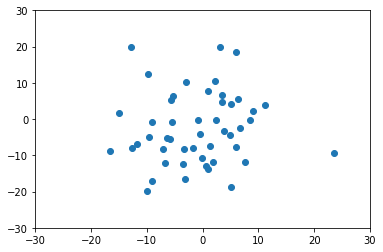

In [53]:
import numpy.random as rnd
data = rnd.normal(0,10,(50,2))
plt.scatter(data[:,0],data[:,1])
plt.xlim(-30,30)
plt.ylim(-30,30)

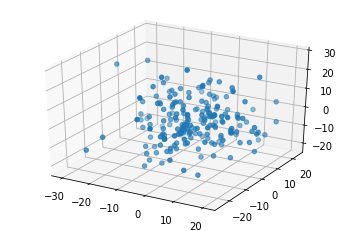

In [51]:
from mpl_toolkits.mplot3d import Axes3D
import numpy.random as rnd
data = rnd.normal(0,10,(200,3))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0],data[:,1],data[:,2])

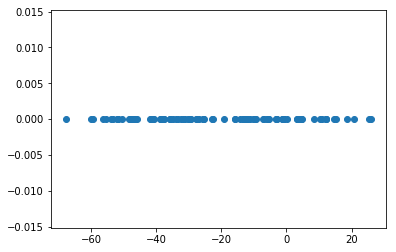

In [64]:
import numpy.random as rnd
data1 = rnd.normal(0,10,50) # 平均0、分散10
data2 = rnd.normal(-40,10,50) # 平均-40、分散10
data_all = np.append(data1,data2)
plt.scatter(data_all,[0 for i in range(100)])

In [63]:
data_all.shape

(100,)

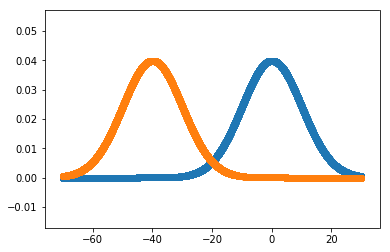

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# ベクトルxを [-5.0, ..., 5.0] の区間で作成
n = np.linspace(-70.0, 30.0, 10000)
m = np.linspace(-70.0, 30.0, 10000)

# 平均0, 標準偏差1の正規分布における、xの確率を求める
p = []
for i in range(len(n)):
    p.append(norm.pdf(x=n[i], loc=0, scale=10))
q = []
for i in range(len(m)):
    q.append(norm.pdf(x=m[i], loc=-40, scale=10))

# 乱数－確率 の特性を散布図で表し、標準正規分布のグラフを作成
plt.scatter(n, p)
plt.scatter(m, q)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[]

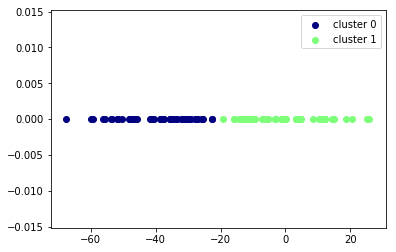

In [141]:
# 混合ガウスモデルでクラスタリングと可視化
from sklearn.mixture import GaussianMixture
from matplotlib import cm
# 想定するクラスタ数
cluster_num = 2
# データのshapeをあわせる（もっとうまいことできるはず。。。）
data_all2 = data_all.reshape((100,1))
data_all_2d = np.concatenate([data_all2,np.zeros((100,1))],axis=1)
data_all_2d = data_all_2d.reshape((100,2))
# 各クラスタ用のガウス分布のパラメータを推定してデータをクラスタリング
gmm = GaussianMixture(n_components=cluster_num,covariance_type='spherical')
pred = gmm.fit_predict(data_all_2d)
# 可視化
for i in range(cluster_num):
    cluster_datas = data_all_2d[pred==i]
    color = cm.jet(i/cluster_num)
    plt.scatter(cluster_datas[:,0],cluster_datas[:,1],c=color,label='cluster {}'.format(i))
plt.legend()
plt.plot()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'DBSCAN : eps=3.2,minPoints=4')

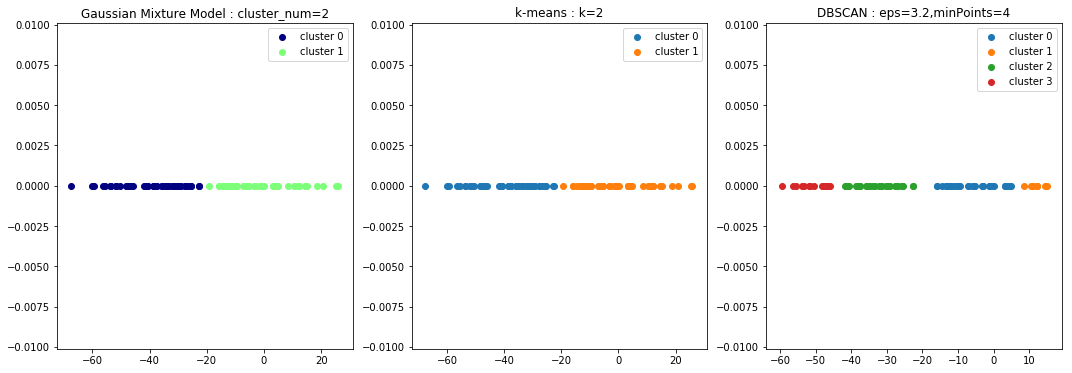

In [169]:
from sklearn.cluster import KMeans,DBSCAN
k = 2
eps = 3.2
minp = 4

plt.figure(figsize=(18,6))

# 混合ガウスモデル可視化
plt.subplot(131)
for i in range(cluster_num):
    cluster_datas = data_all_2d[pred==i]
    color = cm.jet(i/cluster_num)
    plt.scatter(cluster_datas[:,0],cluster_datas[:,1],c=color,label='cluster {}'.format(i))
plt.legend()
plt.title('Gaussian Mixture Model : cluster_num={}'.format(cluster_num))

pred_km = KMeans(n_clusters=k).fit_predict(data_all_2d)
pred_db = DBSCAN(eps=eps,min_samples=minp).fit_predict(data_all_2d)


plt.subplot(132)
for i in range(k):
    target_km = data_all_2d[pred_km==i]
    plt.scatter(target_km[:,0],target_km[:,1],label='cluster {}'.format(i))
plt.legend()
plt.title('k-means : k={}'.format(k))

plt.subplot(133)
for i,cluster_id in enumerate(np.unique(pred_db)):
    if(cluster_id == -1):
        continue
    target_db = data_all_2d[pred_db==cluster_id]
    plt.scatter(target_db[:,0],target_db[:,1],label='cluster {}'.format(cluster_id))
plt.legend()
plt.title('DBSCAN : eps={},minPoints={}'.format(eps,minp))
    

In [106]:
def plot_gmm_result(datas,pred,cluster_num):
    # 可視化
    for i in range(cluster_num):
        cluster_datas = datas[pred==i]
        color = cm.jet(i/cluster_num)
        plt.scatter(cluster_datas[:,0],cluster_datas[:,1],c=color,label='cluster {}'.format(i))
    plt.legend()
    plt.plot()

In [102]:
#print(gmm.weights_)
print(gmm.means_)
print(gmm.covariances_)

[[-40.5799137    0.        ]
 [ -0.99576987   0.        ]]
[57.56458723 67.51802397]


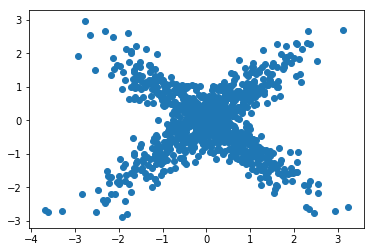

In [174]:
# データ読み込み
df1 = pd.read_csv('./data/data1.csv')
data1_array = df1.values
plt.scatter(data1_array[:,0],data1_array[:,1])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


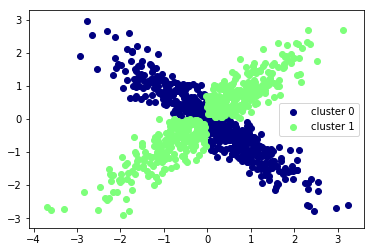

In [175]:
cluster_num = 2
pred_x = GaussianMixture(n_components=cluster_num).fit_predict(data1_array)
plot_gmm_result(data1_array,pred_x,cluster_num)

In [189]:
def compare_clustering_method(target_data,pred,cluster_num,k,eps,minp):
    from sklearn.cluster import KMeans,DBSCAN
    plt.figure(figsize=(22,6))

    # 混合ガウスモデル可視化
    plt.subplot(131)
    for i in range(cluster_num):
        cluster_datas = target_data[pred==i]
        color = cm.jet(i/cluster_num)
        plt.scatter(cluster_datas[:,0],cluster_datas[:,1],c=color,label='cluster {}'.format(i))
    plt.legend()
    plt.title('Gaussian Mixture Model : cluster_num={}'.format(cluster_num))

    pred_km = KMeans(n_clusters=k).fit_predict(target_data)
    pred_db = DBSCAN(eps=eps,min_samples=minp).fit_predict(target_data)


    plt.subplot(132)
    for i in range(k):
        target_km = target_data[pred_km==i]
        plt.scatter(target_km[:,0],target_km[:,1],label='cluster {}'.format(i))
    plt.legend()
    plt.title('k-means : k={}'.format(k))

    plt.subplot(133)
    for i,cluster_id in enumerate(np.unique(pred_db)):
        if(cluster_id == -1):
            continue
        target_db = target_data[pred_db==cluster_id]
        plt.scatter(target_db[:,0],target_db[:,1],label='cluster {}'.format(cluster_id))
    plt.legend()
    plt.title('DBSCAN : eps={},minPoints={}'.format(eps,minp))
    

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


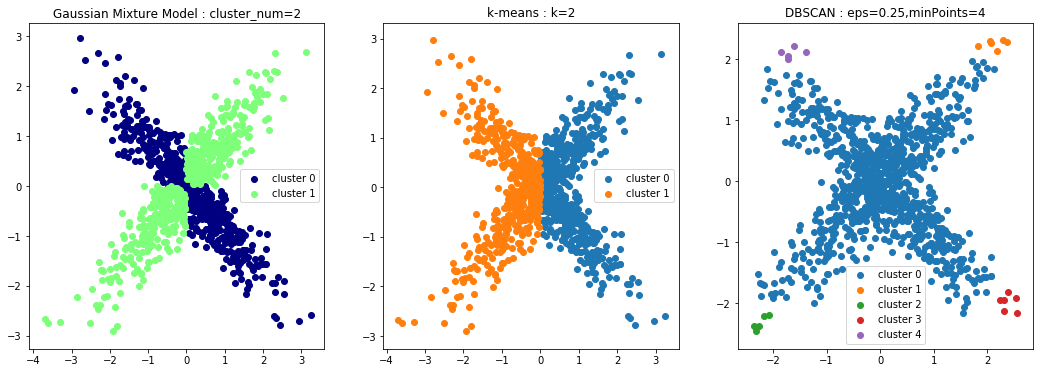

In [184]:
target_data = data1_array
k=2
eps=0.25
minp=4
compare_clustering_method(target_data,pred_x,cluster_num,k,eps,minp)

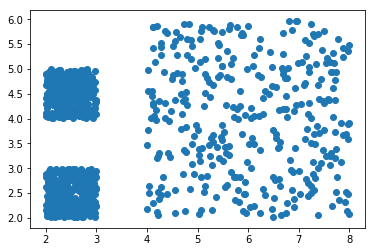

In [185]:
# データ読み込み
df2 = pd.read_csv('./data/data3.csv')
data2_array = df2.values
plt.scatter(data2_array[:,0],data2_array[:,1])

In [187]:
cluster_num = 3
pred_3rec = GaussianMixture(n_components=cluster_num).fit_predict(data2_array)
#plot_gmm_result(data2_array,pred,cluster_num)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


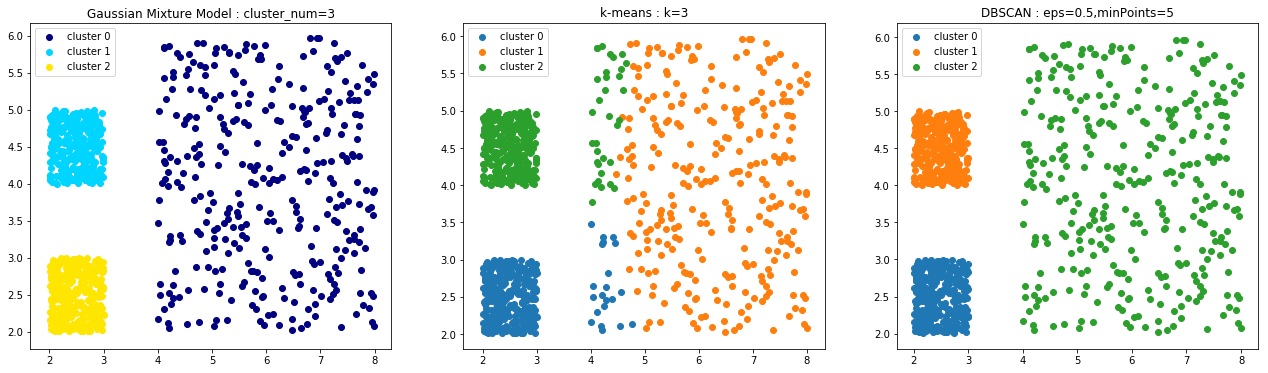

In [193]:
target_data = data2_array
target_pred = pred_3rec
k=3
eps=0.5
minp=5
compare_clustering_method(target_data,target_pred,cluster_num,k,eps,minp)

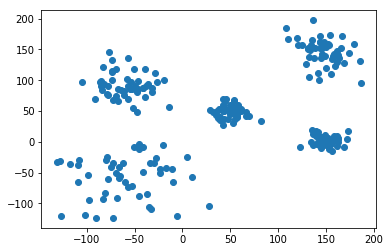

In [194]:
# データ読み込み
df4 = pd.read_csv('./data/data4.csv')
data4_array = df4.values
plt.scatter(data4_array[:,0],data4_array[:,1])

In [196]:
cluster_num = 5
pred_5norm = GaussianMixture(n_components=cluster_num).fit_predict(data4_array)
#plot_gmm_result(data4_array,pred,cluster_num)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

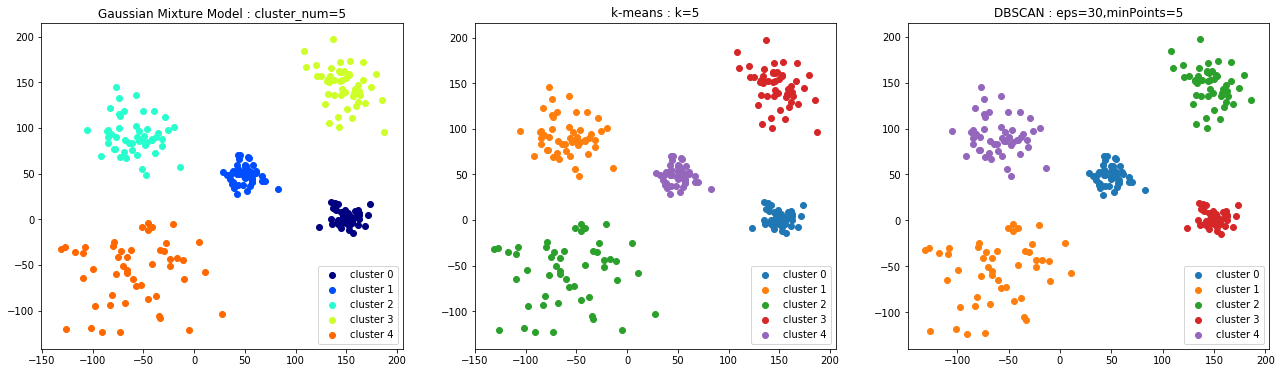

In [200]:
target_data = data4_array
target_pred = pred_5norm
k=5
eps=30
minp=5
compare_clustering_method(target_data,target_pred,cluster_num,k,eps,minp)

(600, 3)


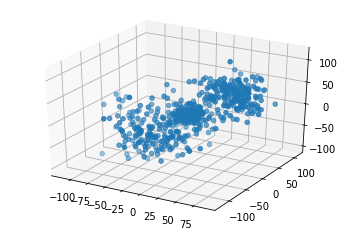

In [120]:
from mpl_toolkits.mplot3d import Axes3D
import numpy.random as rnd
data3d_1 = rnd.normal(0,10,(200,3))
data3d_2 = rnd.normal(-30,30,(200,3))
data3d_3 = rnd.normal(40,20,(200,3))
data3d_all = np.append(data3d_1,data3d_2)
data3d_all = np.append(data3d_all,data3d_3)
data3d_all = data3d_all.reshape((600,3))
print(data3d_all.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(data3d_1[:,0],data3d_1[:,1],data3d_1[:,2])
#ax.scatter(data3d_2[:,0],data3d_2[:,1],data3d_2[:,2])
#ax.scatter(data3d_3[:,0],data3d_3[:,1],data3d_3[:,2])
ax.scatter(data3d_all[:,0],data3d_all[:,1],data3d_all[:,2])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


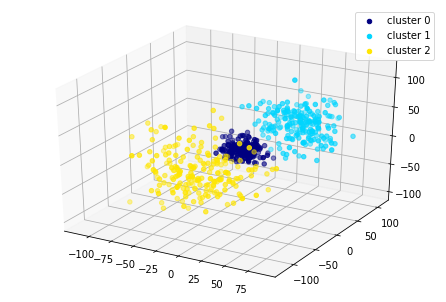

In [130]:
cluster_num = 3
pred = GaussianMixture(n_components=cluster_num).fit_predict(data3d_all)
fig = plt.figure()
ax = Axes3D(fig)
for i in range(cluster_num):
    target_datas = data3d_all[pred==i]
    color = cm.jet(i/cluster_num)
    ax.scatter(target_datas[:,0],target_datas[:,1],target_datas[:,2],c=color,label='cluster {}'.format(i))
plt.legend()
plt.show()

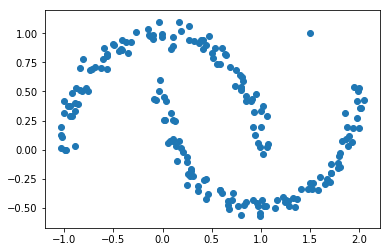

In [201]:
# データ読み込み
dfmon = pd.read_csv('./data/moon.csv')
datamon_array = dfmon.values
plt.scatter(datamon_array[:,0],datamon_array[:,1])

In [202]:
cluster_num = 2
pred_mon = GaussianMixture(n_components=cluster_num).fit_predict(datamon_array)
#plot_gmm_result(datamon_array,pred,cluster_num)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


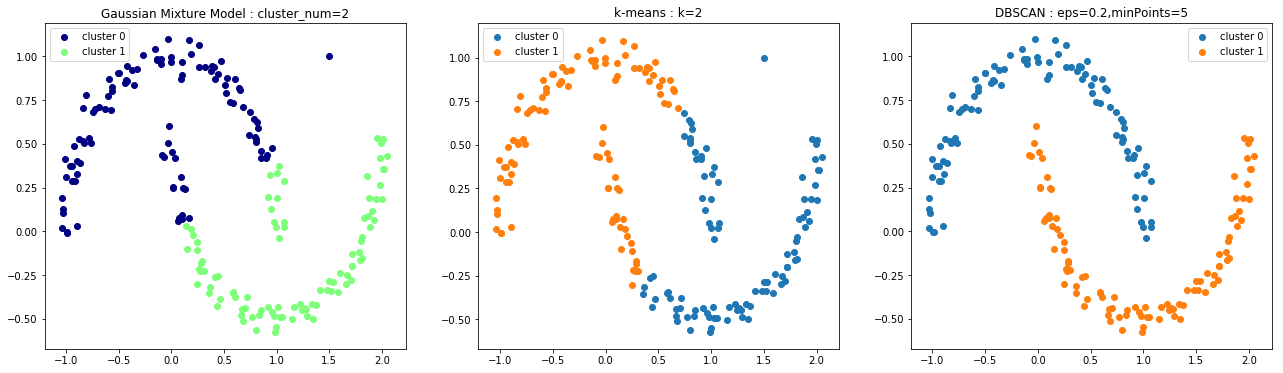

In [205]:
target_data = datamon_array
target_pred = pred_mon
k=2
eps=0.2
minp=5
compare_clustering_method(target_data,target_pred,cluster_num,k,eps,minp)